In [1]:
import ast
import numpy as np
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns
from adjustText import adjust_text

df = pd.read_csv('/Users/andreawei/Documents/Learnings/Python Project/Datasets/jobs_data_final.csv')
df['date_time'] = pd.to_datetime(df['date_time'])
df = df.dropna(subset='salary_standardized')

/opt/anaconda3/envs/Project1.0/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Finding the 10 most in-demand skills

df_skill_demand = df.groupby('job_skills').agg(median_salary=('salary_standardized', 'median'), job_count=('job_skills', 'count')).sort_values(by='job_count', ascending=False).head(10)
df_skill_demand = df_skill_demand.reset_index()
top10_skills = df_skill_demand['job_skills']

total_job_count = df['job_skills'].count() 
df_skill_demand['skill_percent'] = df_skill_demand['job_count'] / total_job_count * 100
df_skill_demand = df_skill_demand.set_index('job_skills')

print(top10_skills)
print(df_skill_demand)

0           sql
1         excel
2       tableau
3        python
4      power_bi
5             r
6           sas
7    powerpoint
8          word
9           aws
Name: job_skills, dtype: object
            median_salary  job_count  skill_percent
job_skills                                         
sql              96500.00       4474      15.805836
excel            80000.18       2976      10.513672
tableau          96500.00       2558       9.036953
python          100000.00       2445       8.637745
power_bi         91600.25       2332       8.238536
r               100000.00       1499       5.295697
sas              90000.00        701       2.476507
powerpoint       87050.00        617       2.179750
word             75000.00        589       2.080831
aws             105800.00        557       1.967781


In [3]:
# Adding a technology type column, 'technology', to create a dataframe for the 10 most in-demand skills

technology = {'Programming': ['python', 'r', 'sql'], 'Analyst Tool': ['sas', 'tableau', 'power_bi', 'excel', 'powerpoint', 'word'], 'Cloud': ['aws']}

df_technology = pd.DataFrame(list(technology.items()), columns=['technology', 'skills'])
df_technology = df_technology.explode('skills')

demand_skill_tech = df_skill_demand.merge(df_technology, left_on='job_skills', right_on='skills')
demand_skill_tech = demand_skill_tech.set_index('skills').sort_values(by='median_salary', ascending=False)
demand_skill_tech

,median_salary,job_count,skill_percent,technology
skills,,,,
aws,105800.00,557,1.967781,Cloud
python,100000.00,2445,8.637745,Programming
r,100000.00,1499,5.295697,Programming
sql,96500.00,4474,15.805836,Programming
tableau,96500.00,2558,9.036953,Analyst Tool
power_bi,91600.25,2332,8.238536,Analyst Tool
sas,90000.00,701,2.476507,Analyst Tool
powerpoint,87050.00,617,2.179750,Analyst Tool
excel,80000.18,2976,10.513672,Analyst Tool


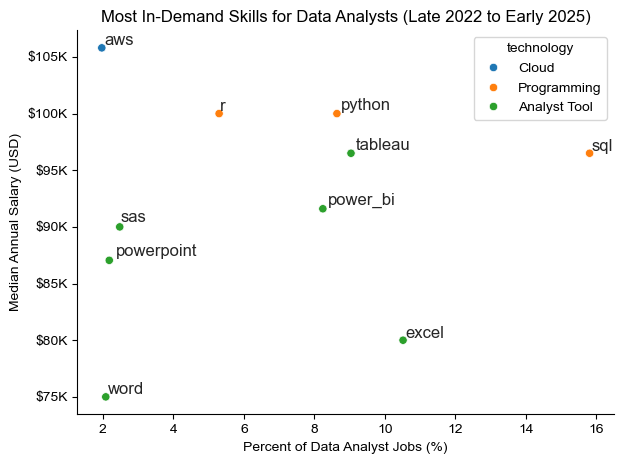

In [4]:
sns.scatterplot(data=demand_skill_tech, x='skill_percent', y='median_salary', hue='technology')

sns.despine()
sns.set_theme(style='ticks')

txts = []
for i, txt in enumerate(demand_skill_tech.index):
    txts.append(plt.text(demand_skill_tech['skill_percent'].iloc[i], demand_skill_tech['median_salary'].iloc[i], txt, fontsize=12))

adjust_text(txts, arrowprops=dict(arrowstyle='->', color='gray'))

xs_format = lambda x, pos: f'${int(x/1000)}K'
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(xs_format))

plt.title('Most In-Demand Skills for Data Analysts (Late 2022 to Early 2025)')
plt.xlabel('Percent of Data Analyst Jobs (%)')
plt.ylabel('Median Annual Salary (USD)')
plt.tight_layout()
plt.show()

In [5]:
# Finding the top 10 highest paid skills

df_skill_pay = df.groupby('job_skills').agg(median_salary=('salary_standardized', 'median'), job_count=('job_skills', 'count')).sort_values(by='median_salary', ascending=False).head(10)
df_skill_pay = df_skill_pay.reset_index()
top10_paid_skills = df_skill_pay['job_skills']
print(top10_paid_skills)
print(df_skill_pay)

0    objective-c
1          c/c++
2         kotlin
3         golang
4         no-sql
5           nltk
6           rust
7        pyspark
8        pytorch
9           gdpr
Name: job_skills, dtype: object
    job_skills  median_salary  job_count
0  objective-c    164500.0000          1
1        c/c++    154000.0000          6
2       kotlin    147000.0000          1
3       golang    146250.0000          4
4       no-sql    140400.0000         11
5         nltk    134500.0000         10
6         rust    127839.8325          2
7      pyspark    126500.0000         81
8      pytorch    126000.0000         70
9         gdpr    125200.0000         24


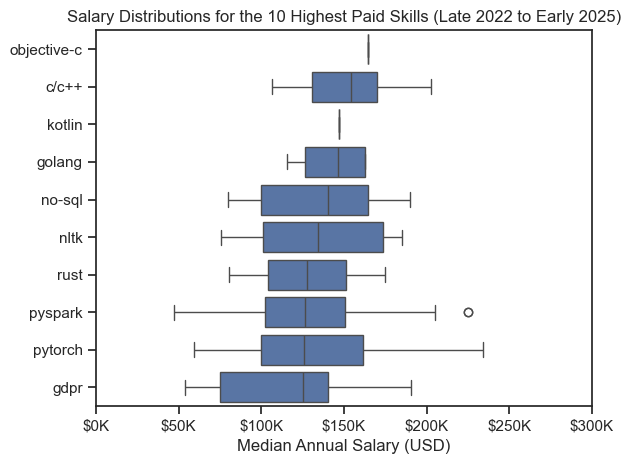

In [6]:
df_paid_top10 = df[df['job_skills'].isin(top10_paid_skills)]

sns.boxplot(data=df_paid_top10, y='job_skills', x='salary_standardized', order=df_skill_pay['job_skills'])
sns.set_theme(style='ticks')

plt.title('Salary Distributions for the 10 Highest Paid Skills (Late 2022 to Early 2025)')
plt.xlabel('Median Annual Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.tight_layout()
plt.show()

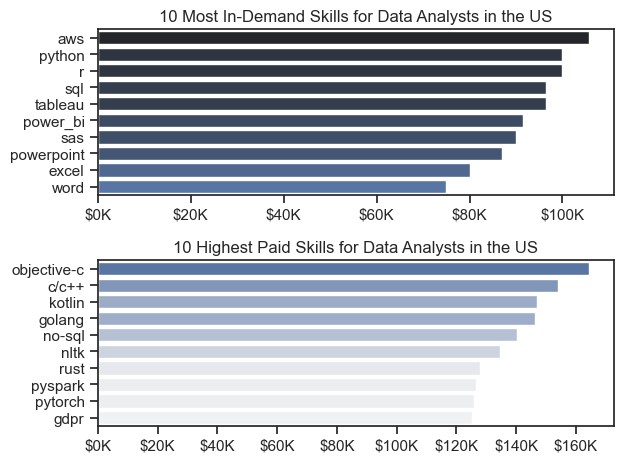

In [7]:
fig, ax = plt.subplots(2, 1)

sns.barplot(data=demand_skill_tech, x='median_salary', y=demand_skill_tech.index, hue='median_salary', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
ax[0].set_title('10 Most In-Demand Skills for Data Analysts in the US')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.barplot(data=df_skill_pay, x='median_salary', y='job_skills', hue='median_salary', ax=ax[1], palette='light:b')
ax[1].legend().remove()
ax[1].set_title('10 Highest Paid Skills for Data Analysts in the US')
ax[1].set_ylabel('')
ax[1].set_xlabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()